<a href="https://colab.research.google.com/github/SHIVALIKA672/Monte-Carlo-Simulation-and-fbprophet-Hybrid-approach/blob/main/Monte_Carlo_Simulation_and_fbprophet_Hybrid_approach_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation and Efficient Frontier
- Introduction to Monte Carlo Simulation
- Applying Monte Carlo Simulation on portfolios using Sharpe Ratio (from last lesson)
- Creating Efficient Frontier based on Sharpe Ratio

### Monte Carlo Simulation with Portfolios and Sharpe Ratio

In [ ]:
!pip install yfinance

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.express as px
from fbprophet import Prophet
import time
t1 = time.perf_counter()
# %matplotlib notebook
%matplotlib inline

In [ ]:
tickers = ['AAPL', 'MSFT','TSLA','NFLX','GOOG','FB','AMZN']
# tickers = ['RELIANCE.NS', 'TCS.NS','TSLA']
# tickers=['LODHA.NS','TATAMOTORS.NS','JUBLFOOD.NS','TATACHEM.NS']
#start = dt.datetime(2020, 1, 1)
start = "2014-01-01"

df = yf.download(tickers, start=start)

[*********************100%***********************]  7 of 7 completed


In [ ]:
data = df['Adj Close']

In [ ]:
data.head()

,AAPL,AMZN,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2014-01-02,17.468651,397.970001,54.709999,554.481689,31.724440,51.831429,30.020000
2014-01-03,17.084932,396.440002,54.560001,550.436829,31.511002,51.871429,29.912001
2014-01-06,17.178104,393.630005,57.200001,556.573853,30.845091,51.367142,29.400000
2014-01-07,17.055246,398.029999,57.919998,567.303589,31.084133,48.500000,29.872000
2014-01-08,17.163263,401.920013,58.230000,568.484192,30.529219,48.712856,30.256001


In [ ]:
log_returns = np.log(data/data.shift())

In [ ]:
log_returns

,AAPL,AMZN,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.022211,-0.003852,-0.002745,-0.007322,-0.006751,0.000771,-0.003604
2014-01-06,0.005439,-0.007113,0.047253,0.011088,-0.021359,-0.009769,-0.017265
2014-01-07,-0.007178,0.011116,0.012509,0.019095,0.007720,-0.057435,0.015927
2014-01-08,0.006313,0.009726,0.005338,0.002079,-0.018013,0.004379,0.012773
...,...,...,...,...,...,...,...
2022-05-17,0.025105,0.040310,0.012815,0.016493,0.020140,0.021482,0.050132
2022-05-18,-0.058073,-0.074252,-0.052588,-0.037547,-0.046599,-0.072744,-0.070437
2022-05-19,-0.024950,0.001926,-0.004954,-0.014838,-0.003706,0.034883,-0.000550


In [ ]:
weight = np.random.random(len(tickers))
weight /= weight.sum()
weight

array([0.19224019, 0.12782396, 0.206186  , 0.04763704, 0.15721183,
       0.05016354, 0.21873744])

In [ ]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [ ]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [ ]:
sharpe_ratio = exp_rtn / exp_vol

In [ ]:
sharpe_ratio

0.8794909221572121

In [ ]:
# Monte Carlo Simulation
n = 15000

weights = np.zeros((n, len(tickers)))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(len(tickers))
    weight /= weight.sum()
    weights[i] = weight

    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [ ]:
sharpe_ratios

array([0.85371511, 0.83766839, 0.89852403, ..., 0.84335752, 0.88569178,
       0.82462684])

In [ ]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return np.asarray(norm_arr)

Text(0, 0.5, 'Expected Return')

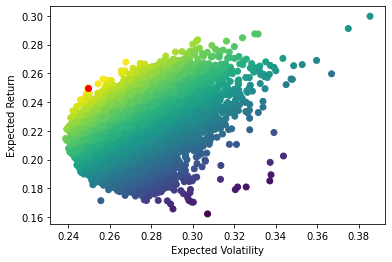

In [ ]:
# index = np.where(normalize(exp_vols,0,1) <= 1)
# plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[np.where(sharpe_ratios == sharpe_ratios[index].max())], exp_rtns[np.where(sharpe_ratios == sharpe_ratios[index].max())], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

In [ ]:
print(abs(t1 - time.perf_counter()))
t2 = time.perf_counter()

51.34783833100002


# Predicting us Facebook prophet

In [ ]:
df = df['Adj Close']
fig = px.line(df, x=df.index, y=df.columns)
fig.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AAPL


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AMZN
FB


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


GOOG
MSFT


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NFLX


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


TSLA


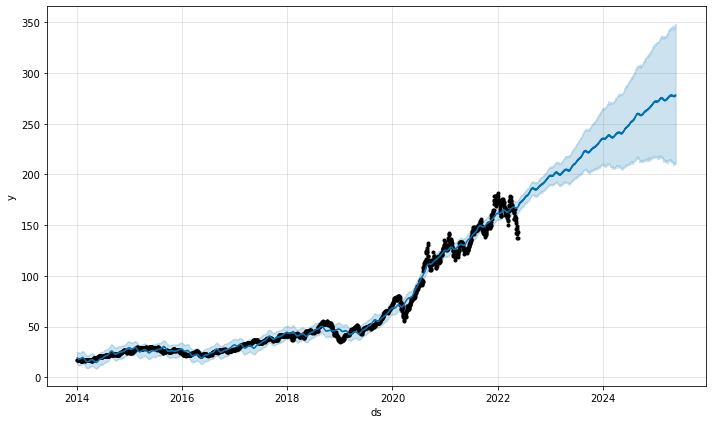

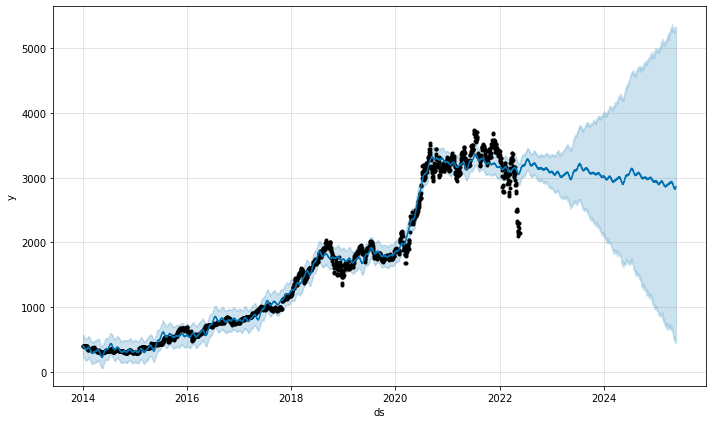

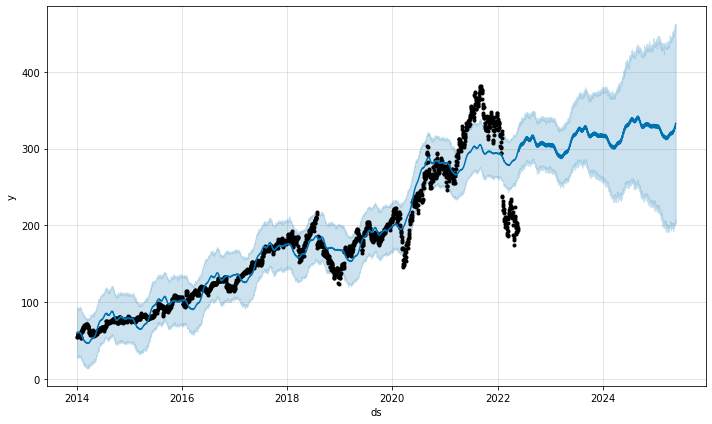

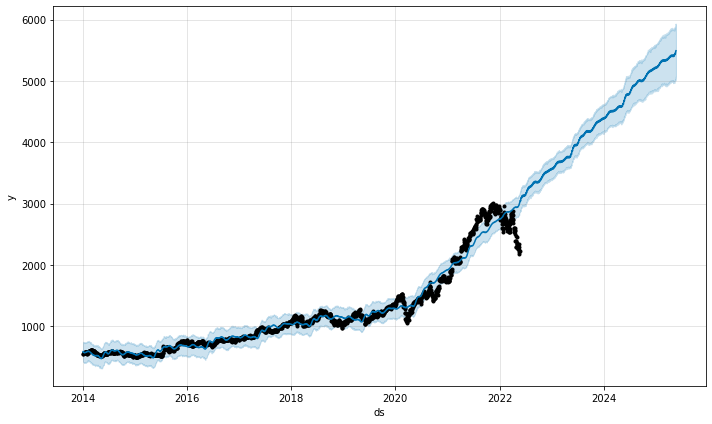

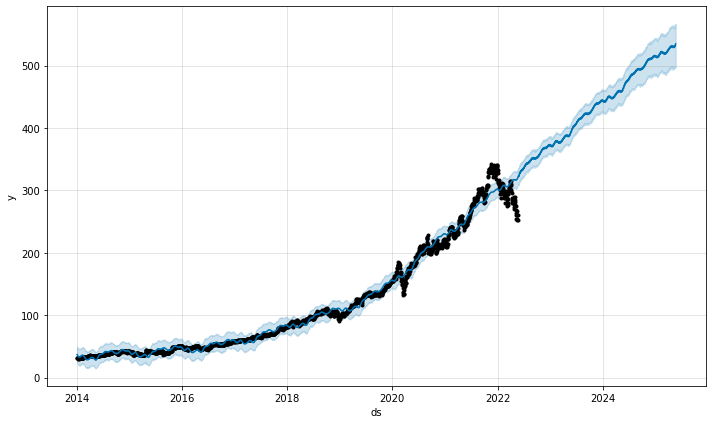

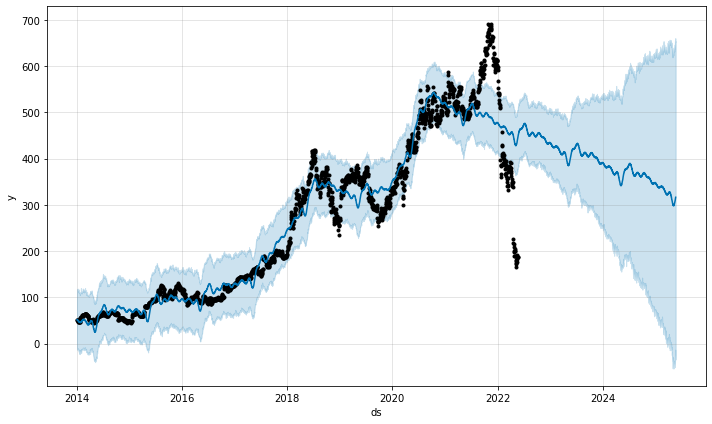

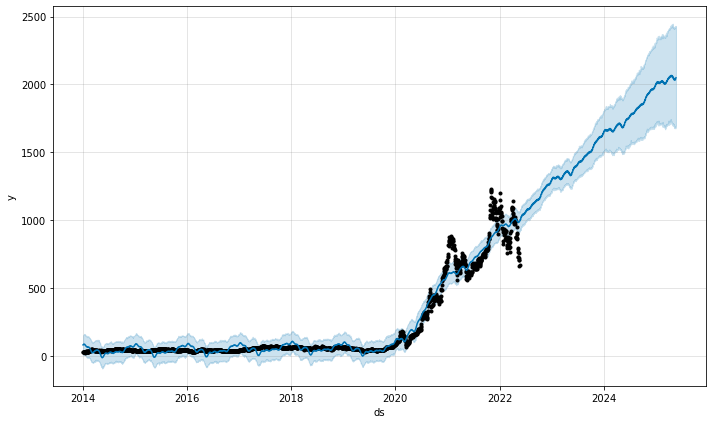

In [ ]:
preds = {}
for ticker in df.columns:
  stock = df[[ticker]]
  stock.reset_index(inplace=True)
  stock = stock.rename(columns={"Date": "ds", ticker: "y"})
  stock.dropna(axis=0,inplace=True)
  print(ticker)
  model=Prophet()
  model.fit(stock)
  future_dates=model.make_future_dataframe(periods=1095)
  prediction=model.predict(future_dates)
  preds[ticker] = [prediction,model.plot(prediction),model]


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(preds['AAPL'][2], initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2016-06-18 00:00:00 and 2021-05-23 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-06-20,21.990234,21.117948,22.791630,22.084072,2016-06-18
1,2016-06-21,21.879459,20.942553,22.802913,22.272173,2016-06-18
2,2016-06-22,21.831009,20.905548,22.833091,22.188572,2016-06-18
3,2016-06-23,21.769768,20.788362,22.719078,22.316292,2016-06-18
4,2016-06-24,21.718163,20.800289,22.605793,21.689306,2016-06-18


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,81.314442,9.017452,6.529319,0.104769,0.070433,0.235507
1,39 days,83.107392,9.116326,6.609259,0.105824,0.072060,0.225673
2,40 days,85.777777,9.261629,6.730040,0.108359,0.072153,0.215580
3,41 days,88.867771,9.426970,6.881622,0.111444,0.075750,0.204710
4,42 days,89.546311,9.462891,6.935289,0.112691,0.076331,0.199275


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



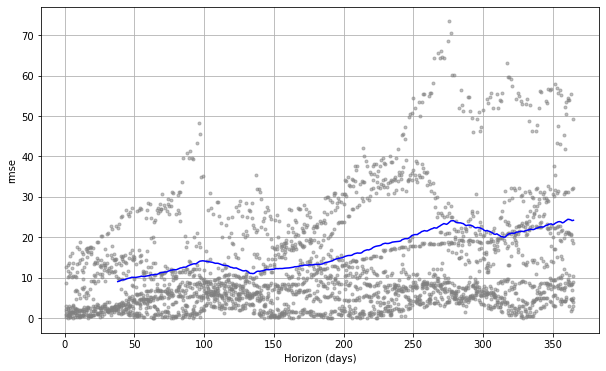

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
f_preds = []
for x in preds:
  f_predict = preds[x][0][-30:][['yhat','yhat_upper']].mean().mean()
  now = df[x][-1]
  print(x,f"percentage change %:{(f_predict-now)/now*100}")
  f_preds.append((f_predict-now)/now)

AAPL percentage change %:116.88551141149387
AMZN percentage change %:91.69579799747156
FB percentage change %:96.61278243573055
GOOG percentage change %:153.55351441894442
MSFT percentage change %:110.0072780320367
NFLX percentage change %:148.12961036112557
TSLA percentage change %:231.53499804223077


In [ ]:
print(abs(t2 - time.perf_counter()))

45.322201809999996


In [ ]:
t2 = time.perf_counter()
print('time taken to run:',t2-t1)

time taken to run: 96.680472552


In [ ]:
weights

array([[0.22120527, 0.03226767, 0.22545301, ..., 0.23589823, 0.12586654,
        0.0896257 ],
       [0.26294552, 0.05747603, 0.25007218, ..., 0.02340703, 0.07051257,
        0.23329381],
       [0.08742938, 0.31010397, 0.0687443 , ..., 0.26100814, 0.02654409,
        0.12258958],
       ...,
       [0.19417541, 0.08628196, 0.17468336, ..., 0.19575725, 0.13460967,
        0.07811392],
       [0.23219029, 0.10863537, 0.0368978 , ..., 0.19237807, 0.18579482,
        0.19237795],
       [0.08837293, 0.05065035, 0.18787658, ..., 0.2486458 , 0.12979719,
        0.0883829 ]])

In [ ]:
tickers

['AAPL', 'MSFT', 'TSLA', 'NFLX', 'GOOG', 'FB', 'AMZN']

In [ ]:
profet_preds = np.array([sum(x)/1.5 for x in weights*f_preds])

Text(0, 0.5, 'Expected Return')

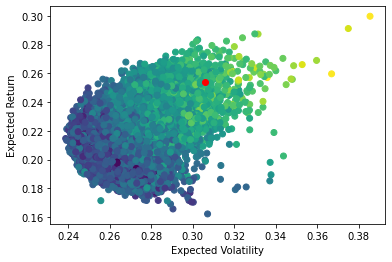

In [ ]:
index = np.where(normalize(exp_vols,0,1) <= 0.5)
# plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=profet_preds)
ax.scatter(exp_vols[np.where(profet_preds == profet_preds[index].max())], exp_rtns[np.where(profet_preds == profet_preds[index].max())], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

# Hybrid Approach

In [ ]:
hybrid_ratios = profet_preds + sharpe_ratios

In [ ]:
np.array([sum(x) for x in weights*f_preds])

array([1.26642872, 1.42908055, 1.25300802, ..., 1.27986525, 1.4183548 ,
       1.31842744])

In [ ]:
hybrid_ratios

array([1.69800093, 1.79038875, 1.73386271, ..., 1.69660102, 1.83126165,
       1.70357846])

In [ ]:
profet_preds

array([0.84428582, 0.95272037, 0.83533868, ..., 0.8532435 , 0.94556987,
       0.87895162])

In [ ]:
weights[hybrid_ratios.argmax()]*100

array([26.45938103,  1.2906004 ,  0.86261039,  9.29028596, 10.39373442,
        7.61253837, 44.09084943])

In [ ]:
weights[profet_preds.argmax()]*100

array([ 3.812516  , 16.24462447,  6.53582101,  8.53879317,  4.47221499,
        1.04568026, 59.3503501 ])

In [ ]:
weights[4655]


array([0.19476116, 0.21295001, 0.12533287, 0.0398289 , 0.11351111,
       0.04715349, 0.26646246])

In [ ]:
profet_preds.argmax()

8917

In [ ]:
print('time taken to run:',time.perf_counter()-t1)

time taken to run: 111.58106682100001


In [ ]:
print(abs(t1 - time.perf_counter()))

111.59348611300001


Text(0, 0.5, 'Expected Return')

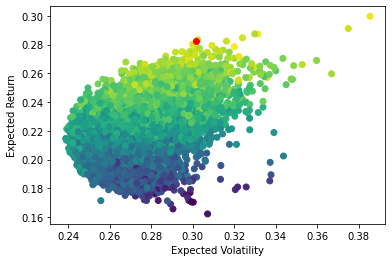

In [ ]:
index = np.where(normalize(exp_vols,0,1) <= 0.5)
# plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=hybrid_ratios)
ax.scatter(exp_vols[np.where(hybrid_ratios == hybrid_ratios[index].max())], exp_rtns[np.where(hybrid_ratios == hybrid_ratios[index].max())], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')